**What is a time series?**

According to the wikipedia, A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. For example, stock prices over a fixed period of time, hotel bookings, ecommerce sales, waether cycle reports etc.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.


Let's discuss a few definitions related to time series first.

**Definitions**

* **Level:** Level is the average of the values of the series.
* **Trend:** Trend shows a pattern in the data. For example, whether the stock prices are increasing with time(uptrend) or are they decreasing with time(downtrend) or time doesn't have that much effect on the prices(Horizontal trend)
<img src='trends.PNG'>

Image Courtsey: Financial Hub
* **Seasonality:** When the data shows a repetative pattern for over an year, it can be termed as seasonal pattern. For example, the sale of airconditioners will increase every year during summer and the sale will decrease during winter.
* **Cyclic Patterns:** These are the repetative patterns shown over a longer period of time(more than one year). For example, after every five year the share market has some fluctuations due to the general elections. 
* **Noise:** The variations which do not  show any pattern.


Let's now take an example to see what was done before the advent of Time Series Analysis.

Let's say that we have a problem at hand where we have been asked to predict the sales of skiing products for a sports manufacturer. You can do the predictions using the following methods:

**Old Methods**
* **Using Average:** You might give the prediction as the average of all the prevous values.
* **Using Moving Average:** This is the average of the previous values over a fixed period. For example  you might predict the sales in November based on the average of past 3 months. The past three months will be August, September and October. If you are predicting the sales for December, the past three months will be September, October and November. Although the number of months considered are same but the window moved from one set of months to another. Hence the name Moving Average.
* **Using the Naive Method:** The Naive method says that the prediction will be same as the last figure. For example, the prediction for November will be the sales for October.
* **Using the Seasonal Naive Method:**  Seasonal naive method is similar to naive method. Here, the new prediction is equal to the sales for the previous season.

## ARIMA

In [24]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [3]:
female_birth_data=pd.read_csv("daily-total-female-births-CA.csv") # This is a free datset

In [1]:
female_birth_data

NameError: name 'female_birth_data' is not defined

In [2]:
birth_data=pd.read_csv("daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])

NameError: name 'pd' is not defined

In [3]:
birth_data.head()

NameError: name 'birth_data' is not defined

In [4]:
birth_data.describe()

NameError: name 'birth_data' is not defined

In [5]:
birth_data.plot() #almost a stationary series

NameError: name 'birth_data' is not defined

In [6]:
# also called as smoothing
moving_average_birth=birth_data.rolling(window=20).mean()  # window: This is the number of observations used for calculating the statistic. 

NameError: name 'birth_data' is not defined

In [7]:
moving_average_birth

NameError: name 'moving_average_birth' is not defined

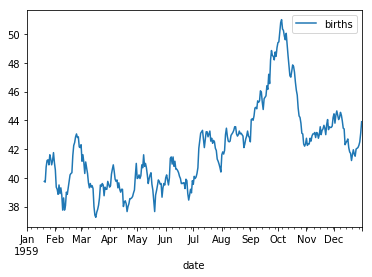

In [23]:
moving_average_birth.plot() # we can see that there is a peak in the month of october

In [25]:
sm.stats.durbin_watson(birth_data) # very less correlation

array([0.04624491])

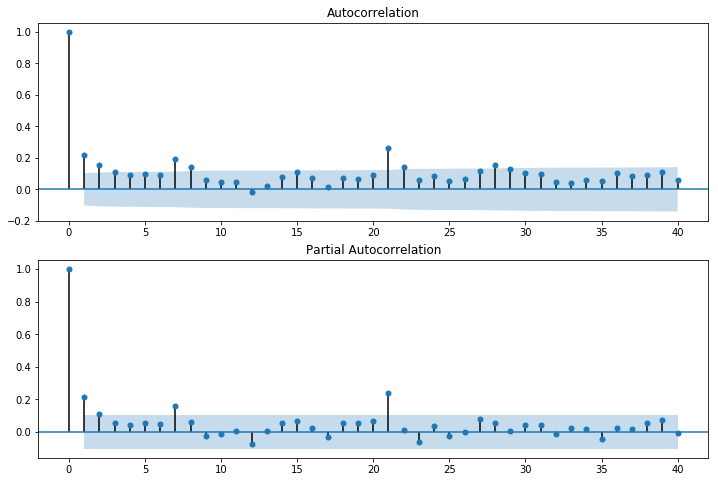

In [26]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(birth_data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(birth_data, lags=40, ax=ax2)

In [27]:
training_data=birth_data[0:320]
test_data=birth_data[320:]

In [31]:
"""
from sklearn.model_selection import train_test_split
t_x,t=train_test_split(birth_data)
""""""

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from statsmodels.tsa.

In [45]:
arima= ARIMA(training_data,order=(2,1,3))

C:\Users\virat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\virat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\virat\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [46]:
model=arima.fit()

In [47]:
model.aic

2159.076974912458

In [48]:
pred= model.forecast(steps=45)[0]

In [49]:
pred

array([44.20336376, 44.64661409, 43.40243639, 43.18642407, 42.46860908,
       43.44949502, 43.80021262, 44.81159761, 44.23852903, 43.97639274,
       42.83728932, 43.04815868, 43.14699235, 44.33687764, 44.50162656,
       44.71946592, 43.69098356, 43.32064023, 42.82208716, 43.6233574 ,
       44.11878344, 44.92162375, 44.49438888, 44.08981115, 43.14260896,
       43.23608944, 43.4795044 , 44.49993718, 44.76125302, 44.83139948,
       43.94563728, 43.49084713, 43.1407838 , 43.82776885, 44.4038833 ,
       45.06229125, 44.72230914, 44.2341347 , 43.42110948, 43.44996156,
       43.78382252, 44.68646475, 44.99650633, 44.96865567, 44.17958866])

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
np.sqrt(mean_squared_error(test_data,pred))

6.419420721712673